In [0]:
# import the relevant packages
import matplotlib.pyplot as plt
import pandas as pd
import requests
import seaborn as sns




#Testing API Calls on another set of environmental data


In [0]:
# looking at rainfall, windspeed, wind direction, air temperature, relative humidity API
for variable in ['rainfall', 'wind-speed', 'wind-direction', 'air-temperature', 'relative-humidity']:
    print(variable)
    r = requests.get('https://api.data.gov.sg/v1/environment/{}'.format(variable))
    metadata = r.json()['metadata']
    for key in metadata.keys():
        if key != 'stations':  # don't print information about stations
            print('  {}: {}'.format(key, r.json()['metadata'][key]))

rainfall
  reading_type: TB1 Rainfall 5 Minute Total F
  reading_unit: mm
wind-speed
  reading_type: Wind Speed AVG(S)10M M1M
  reading_unit: knots
wind-direction
  reading_type: Wind Dir AVG (S) 10M M1M
  reading_unit: degrees
air-temperature
  reading_type: DBT 1M F
  reading_unit: deg C
relative-humidity
  reading_type: RH 1M F
  reading_unit: percentage


# API call for PSI data

In [0]:
#psi
r = requests.get('https://api.data.gov.sg/v1/environment/psi')
r.json()

{'api_info': {'status': 'healthy'},
 'items': [{'readings': {'co_eight_hour_max': {'central': 0.28,
     'east': 0.87,
     'national': 0.87,
     'north': 0.44,
     'south': 0.6,
     'west': 0.4},
    'co_sub_index': {'central': 3,
     'east': 9,
     'national': 9,
     'north': 4,
     'south': 6,
     'west': 4},
    'no2_one_hour_max': {'central': 20,
     'east': 26,
     'national': 29,
     'north': 22,
     'south': 26,
     'west': 29},
    'o3_eight_hour_max': {'central': 51,
     'east': 42,
     'national': 51,
     'north': 47,
     'south': 45,
     'west': 36},
    'o3_sub_index': {'central': 22,
     'east': 18,
     'national': 22,
     'north': 20,
     'south': 19,
     'west': 15},
    'pm10_sub_index': {'central': 17,
     'east': 19,
     'national': 30,
     'north': 17,
     'south': 30,
     'west': 17},
    'pm10_twenty_four_hourly': {'central': 17,
     'east': 19,
     'national': 30,
     'north': 17,
     'south': 30,
     'west': 17},
    'pm25_sub_in

In [0]:
# Re-organize data into DataFrame, attempt 1
df = pd.DataFrame(r.json()['items'][0]['readings'])
#df = df.rename(columns={'value': 'psi_twenty_four_hourly'})
df['timestamp (SGT)'] = pd.to_datetime(r.json()['items'][0]['timestamp'].split('+')[0])
df

,o3_sub_index,pm10_twenty_four_hourly,pm10_sub_index,co_sub_index,pm25_twenty_four_hourly,so2_sub_index,co_eight_hour_max,no2_one_hour_max,so2_twenty_four_hourly,pm25_sub_index,psi_twenty_four_hourly,o3_eight_hour_max,timestamp (SGT)
west,15,17,17,4,7,4,0.40,29,7,31,31,36,2019-10-28 18:00:00
national,22,30,30,9,12,10,0.87,29,16,50,50,51,2019-10-28 18:00:00
east,18,19,19,9,10,2,0.87,26,4,43,43,42,2019-10-28 18:00:00
central,22,17,17,3,9,3,0.28,20,5,38,38,51,2019-10-28 18:00:00
south,19,30,30,6,12,10,0.60,26,16,50,50,45,2019-10-28 18:00:00
north,20,17,17,4,8,3,0.44,22,5,32,32,47,2019-10-28 18:00:00


In [0]:
# List of channels we want to access
columns = ["o3_sub_index", "pm25_sub_index"]

columns_list = []
# For each column, we access its information through its API
for column in columns:
    r = requests.get('https://api.data.gov.sg/v1/environment/psi')
    if 'error' not in r.json():
        columns_list.append([r.json()['items'][0]['timestamp'], r.json()['region_metadata']]) 
df2 = pd.DataFrame(columns_list)
df2

,0,1
0,2019-10-22T02:00:00+08:00,"[{'name': 'west', 'label_location': {'latitude..."
1,2019-10-22T02:00:00+08:00,"[{'name': 'west', 'label_location': {'latitude..."


In [0]:
r2 = requests.get('https://api.data.gov.sg/v1/environment/psi?date=2018-12-31')
# Re-organize data into DataFrame, attempt 1
df = pd.DataFrame(r2.json()['items'][0]['readings'])
#df = df.rename(columns={'value': 'psi_twenty_four_hourly'})
df['timestamp (SGT)'] = pd.to_datetime(r2.json()['items'][0]['timestamp'])
df

,o3_sub_index,pm10_twenty_four_hourly,pm10_sub_index,co_sub_index,pm25_twenty_four_hourly,so2_sub_index,co_eight_hour_max,no2_one_hour_max,so2_twenty_four_hourly,pm25_sub_index,psi_twenty_four_hourly,o3_eight_hour_max,timestamp (SGT)
central,18,20,20,4,10,2,0.35,19,3,43,43,43,2018-12-31 01:00:00+08:00
east,8,29,29,4,14,5,0.45,22,7,53,53,18,2018-12-31 01:00:00+08:00
national,18,29,29,5,16,6,0.54,22,10,55,55,43,2018-12-31 01:00:00+08:00
north,17,21,21,5,11,2,0.49,16,4,47,47,39,2018-12-31 01:00:00+08:00
south,17,27,27,5,16,6,0.54,14,10,55,55,40,2018-12-31 01:00:00+08:00
west,15,24,24,5,10,3,0.49,8,4,42,42,36,2018-12-31 01:00:00+08:00


In [0]:
r2.json()

{'api_info': {'status': 'healthy'},
 'items': [{'readings': {'co_eight_hour_max': {'central': 0.35,
     'east': 0.45,
     'national': 0.54,
     'north': 0.49,
     'south': 0.54,
     'west': 0.49},
    'co_sub_index': {'central': 4,
     'east': 4,
     'national': 5,
     'north': 5,
     'south': 5,
     'west': 5},
    'no2_one_hour_max': {'central': 19,
     'east': 22,
     'national': 22,
     'north': 16,
     'south': 14,
     'west': 8},
    'o3_eight_hour_max': {'central': 43,
     'east': 18,
     'national': 43,
     'north': 39,
     'south': 40,
     'west': 36},
    'o3_sub_index': {'central': 18,
     'east': 8,
     'national': 18,
     'north': 17,
     'south': 17,
     'west': 15},
    'pm10_sub_index': {'central': 20,
     'east': 29,
     'national': 29,
     'north': 21,
     'south': 27,
     'west': 24},
    'pm10_twenty_four_hourly': {'central': 20,
     'east': 29,
     'national': 29,
     'north': 21,
     'south': 27,
     'west': 24},
    'pm25_sub_in

In [0]:
r3 = requests.get('https://api.data.gov.sg/v1/environment/psi?date=2017-10-31')
# Re-organize data into DataFrame, attempt 3
df = pd.DataFrame(r3.json()['items'][0]['readings'])
#df = df.rename(columns={'value': 'psi_twenty_four_hourly'})
df['timestamp (SGT)'] = pd.to_datetime(r3.json()['items'][0]['timestamp'])
df


,o3_sub_index,pm10_twenty_four_hourly,pm10_sub_index,co_sub_index,pm25_twenty_four_hourly,so2_sub_index,co_eight_hour_max,no2_one_hour_max,so2_twenty_four_hourly,pm25_sub_index,psi_twenty_four_hourly,o3_eight_hour_max,timestamp (SGT)
central,6,17,17,7,9,2,0.67,47,3,38,38,15,2017-10-31 01:00:00+08:00
east,10,24,24,3,10,2,0.30,39,4,43,43,23,2017-10-31 01:00:00+08:00
national,12,24,24,8,10,8,0.76,47,13,43,43,29,2017-10-31 01:00:00+08:00
north,7,17,17,8,9,2,0.76,46,4,36,36,16,2017-10-31 01:00:00+08:00
south,8,21,21,7,10,8,0.73,23,13,41,41,18,2017-10-31 01:00:00+08:00
west,12,17,17,6,8,8,0.57,11,12,32,32,29,2017-10-31 01:00:00+08:00


In [0]:
from datetime import timedelta, date

dates =[]
def daterange(start_date, end_date):
    for n in range(int ((end_date - start_date).days)):
        yield start_date + timedelta(n)

start_date = date(2019, 1, 1)
end_date = date(2019, 9, 30)
for single_date in daterange(start_date, end_date):
    dates.append(single_date.strftime("%Y-%m-%d"))

dates

['2019-01-01',
 '2019-01-02',
 '2019-01-03',
 '2019-01-04',
 '2019-01-05',
 '2019-01-06',
 '2019-01-07',
 '2019-01-08',
 '2019-01-09',
 '2019-01-10',
 '2019-01-11',
 '2019-01-12',
 '2019-01-13',
 '2019-01-14',
 '2019-01-15',
 '2019-01-16',
 '2019-01-17',
 '2019-01-18',
 '2019-01-19',
 '2019-01-20',
 '2019-01-21',
 '2019-01-22',
 '2019-01-23',
 '2019-01-24',
 '2019-01-25',
 '2019-01-26',
 '2019-01-27',
 '2019-01-28',
 '2019-01-29',
 '2019-01-30',
 '2019-01-31',
 '2019-02-01',
 '2019-02-02',
 '2019-02-03',
 '2019-02-04',
 '2019-02-05',
 '2019-02-06',
 '2019-02-07',
 '2019-02-08',
 '2019-02-09',
 '2019-02-10',
 '2019-02-11',
 '2019-02-12',
 '2019-02-13',
 '2019-02-14',
 '2019-02-15',
 '2019-02-16',
 '2019-02-17',
 '2019-02-18',
 '2019-02-19',
 '2019-02-20',
 '2019-02-21',
 '2019-02-22',
 '2019-02-23',
 '2019-02-24',
 '2019-02-25',
 '2019-02-26',
 '2019-02-27',
 '2019-02-28',
 '2019-03-01',
 '2019-03-02',
 '2019-03-03',
 '2019-03-04',
 '2019-03-05',
 '2019-03-06',
 '2019-03-07',
 '2019-03-

In [0]:
len(res.json()['items'])

23

In [0]:
results = []
timestamp = []
base_url= 'https://api.data.gov.sg/v1/environment/psi?date='
for date in dates:
  res = requests.get(base_url+date)
  for i in range(len(res.json()['items'])):
    #print(res.json()['items'][i]['timestamp'])
    time = res.json()['items'][i]['timestamp']
    timestamp.append(time)
    # we'll take only the pm25 readings
    #print(res.json()['items'][i]['readings']['pm10_sub_index'])
    results.append(pd.DataFrame(res.json()['items'][i]['readings']['pm25_sub_index'].items()).set_index(0).T)
  
psi_df = pd.concat(results)

psi_df.reset_index(drop = True, inplace = True)
psi_df['timestamp'] = timestamp
psi_df.head(100)
#df_concat.reset_index(drop = True, inplace = True)
#df_concat['timestamp'] = timestamp
#df_concat.head()


,west,national,east,central,south,north,timestamp
0,24,36,35,32,36,36,2019-01-01T01:00:00+08:00
1,24,37,35,31,37,37,2019-01-01T02:00:00+08:00
2,24,39,35,32,37,39,2019-01-01T03:00:00+08:00
3,24,39,35,32,37,39,2019-01-01T04:00:00+08:00
4,24,39,35,32,38,39,2019-01-01T05:00:00+08:00
...,...,...,...,...,...,...,...
95,53,57,55,53,57,54,2019-01-05T04:00:00+08:00
96,54,58,56,54,58,55,2019-01-05T05:00:00+08:00
97,55,59,58,55,59,56,2019-01-05T06:00:00+08:00
98,55,61,59,56,61,57,2019-01-05T07:00:00+08:00


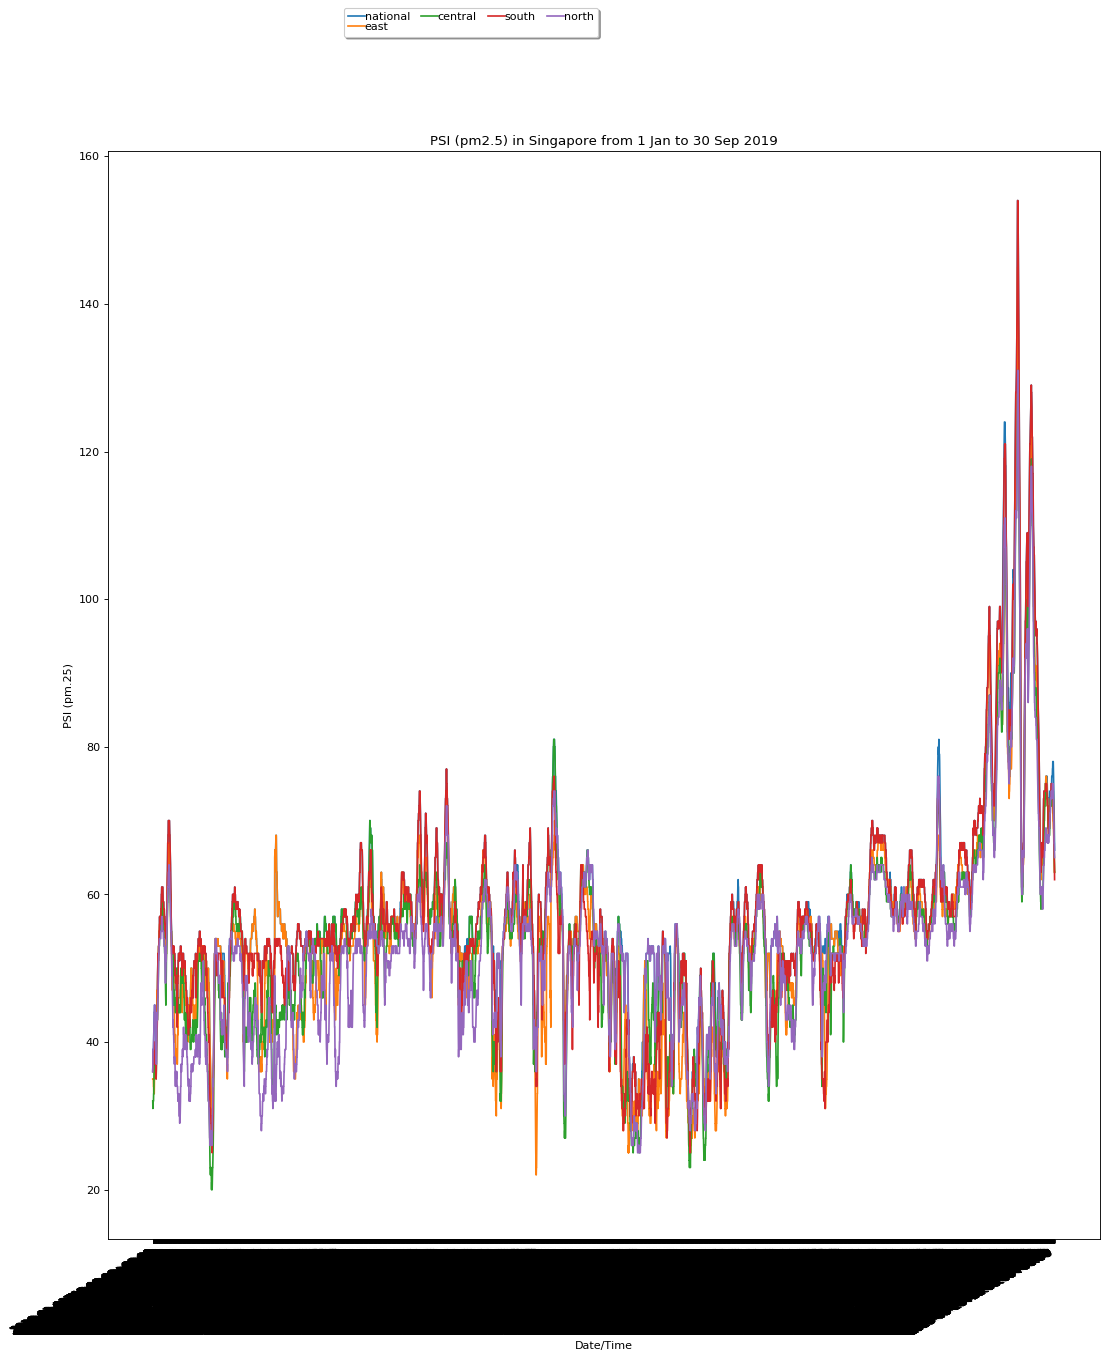

In [40]:
from matplotlib.pyplot import figure
import numpy as np
figure(num=None, figsize=(16,20), dpi=80, facecolor='w', edgecolor='k')

plt.plot(psi_df['timestamp'],psi_df['national'], label='national')
plt.plot(psi_df['timestamp'],psi_df['east'], label ='east')
plt.plot(psi_df['timestamp'],psi_df['central'], label='central')
plt.plot(psi_df['timestamp'],psi_df['south'], label ='south')
plt.plot(psi_df['timestamp'],psi_df['north'], label ='north')
plt.gcf().autofmt_xdate()
plt.legend(ncol=4, loc='lower right', 
           bbox_to_anchor=[0.5, 1.1], 
           columnspacing=1.0, labelspacing=0.0,
           handletextpad=0.0, handlelength=1.5,
           fancybox=True, shadow=True)
#plt.xticks(np.arange(0, 180, 23)) 
# Add title and axis names
plt.title('PSI (pm2.5) in Singapore from 1 Jan to 30 Sep 2019')
plt.xlabel('Date/Time')
plt.ylabel('PSI (pm.25)')
plt.show()

In [0]:
psi_df.head()

,west,national,east,central,south,north,timestamp
0,59,61,61,58,61,58,2019-09-01T01:00:00+08:00
1,59,62,62,58,61,59,2019-09-01T02:00:00+08:00
2,60,62,62,58,61,59,2019-09-01T03:00:00+08:00
3,60,62,62,58,61,60,2019-09-01T04:00:00+08:00
4,60,63,63,59,62,60,2019-09-01T05:00:00+08:00


In [41]:
#create columns for hourly median PSI
psi_df['median']=psi_df.median(axis = 1, skipna = True) 
psi_df['average']=psi_df.mean(axis=1, skipna=True )
#psi_df=psi_df.drop(['median_national'])
psi_df

,west,national,east,central,south,north,timestamp,median,average
0,24,36,35,32,36,36,2019-01-01T01:00:00+08:00,35.5,33.500000
1,24,37,35,31,37,37,2019-01-01T02:00:00+08:00,36.0,33.857143
2,24,39,35,32,37,39,2019-01-01T03:00:00+08:00,36.0,34.571429
3,24,39,35,32,37,39,2019-01-01T04:00:00+08:00,36.0,34.571429
4,24,39,35,32,38,39,2019-01-01T05:00:00+08:00,36.5,34.785714
...,...,...,...,...,...,...,...,...,...
6115,72,72,66,67,67,69,2019-09-29T19:00:00+08:00,68.0,68.714286
6116,71,71,65,66,66,67,2019-09-29T20:00:00+08:00,66.5,67.500000
6117,69,69,64,65,65,67,2019-09-29T21:00:00+08:00,66.0,66.428571
6118,68,68,63,64,64,66,2019-09-29T22:00:00+08:00,65.0,65.428571


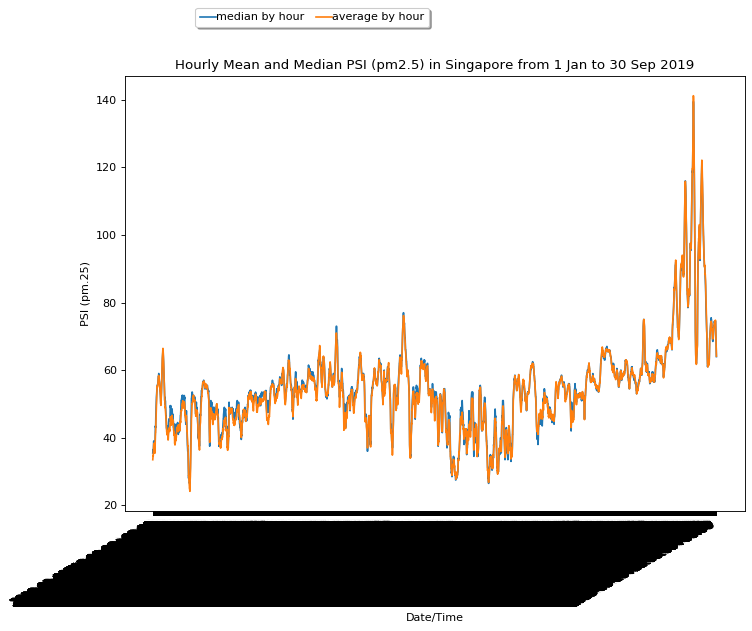

In [42]:
from matplotlib.pyplot import figure
import numpy as np
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

plt.plot(psi_df['timestamp'],psi_df['median'], label='median by hour')
plt.plot(psi_df['timestamp'],psi_df['average'], label='average by hour')
plt.gcf().autofmt_xdate()
plt.legend(ncol=4, loc='lower right', 
           bbox_to_anchor=[0.5, 1.1], 
           columnspacing=1.0, labelspacing=0.0,
           handletextpad=0.0, handlelength=1.5,
           fancybox=True, shadow=True)
#plt.xticks(np.arange(0, 32, 10)) 
# Add title and axis names
plt.title('Hourly Mean and Median PSI (pm2.5) in Singapore from 1 Jan to 30 Sep 2019')
plt.xlabel('Date/Time')
plt.ylabel('PSI (pm.25)')
plt.show()

In [0]:
import os
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns

#psi_df_daily = psi_df.resample('D').sum()

weekly_psi = psi_df
weekly_psi['median'] = psi_df.median.resample('W').median()
weekly_psi['average'] = psi_df.average.resample('W').mean()
print(weekly_psi)


AttributeError: ignored

In [46]:
import os
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns

#psi_df_daily = psi_df.resample('D').sum()

weekly_psi_test2 = psi_df
test_median = weekly_psi_test2.resample('W', on='timestamp').median()
#weekly_psi['average'] = psi_df.average.resample('W').mean()
weekly_psi_test2.head(10)
test_median



TypeError: ignored

In [47]:
weekly_psi_test2["timestamp"] = pd.to_datetime(weekly_psi_test2["timestamp"])
type(weekly_psi_test2.timestamp[0])
weekly_psi_test2.set_index("timestamp")

,west,national,east,central,south,north,median,average
timestamp,,,,,,,,
2019-01-01 01:00:00+08:00,24,36,35,32,36,36,35.5,33.500000
2019-01-01 02:00:00+08:00,24,37,35,31,37,37,36.0,33.857143
2019-01-01 03:00:00+08:00,24,39,35,32,37,39,36.0,34.571429
2019-01-01 04:00:00+08:00,24,39,35,32,37,39,36.0,34.571429
2019-01-01 05:00:00+08:00,24,39,35,32,38,39,36.5,34.785714
...,...,...,...,...,...,...,...,...
2019-09-29 19:00:00+08:00,72,72,66,67,67,69,68.0,68.714286
2019-09-29 20:00:00+08:00,71,71,65,66,66,67,66.5,67.500000
2019-09-29 21:00:00+08:00,69,69,64,65,65,67,66.0,66.428571


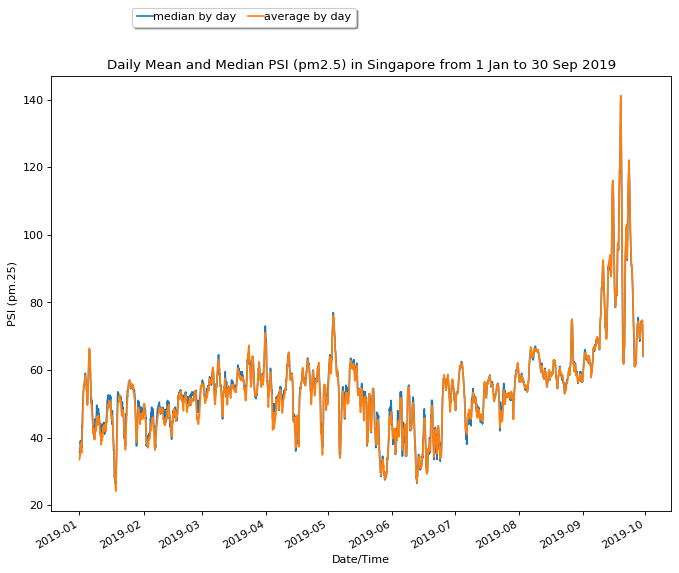

In [63]:
from matplotlib.pyplot import figure
import numpy as np
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

plt.plot(weekly_psi_test2['timestamp'],weekly_psi_test2['median'], label='median by day')
plt.plot(weekly_psi_test2['timestamp'],weekly_psi_test2['average'], label='average by day')
plt.gcf().autofmt_xdate()
plt.legend(ncol=4, loc='lower right', 
           bbox_to_anchor=[0.5, 1.1], 
           columnspacing=1.0, labelspacing=0.0,
           handletextpad=0.0, handlelength=1.5,
           fancybox=True, shadow=True)
#plt.xticks(np.arange(0, 180, 10)) 
# Add title and axis names
plt.title('Daily Mean and Median PSI (pm2.5) in Singapore from 1 Jan to 30 Sep 2019')
plt.xlabel('Date/Time')
plt.ylabel('PSI (pm.25)')
plt.show()

AttributeError: ignored

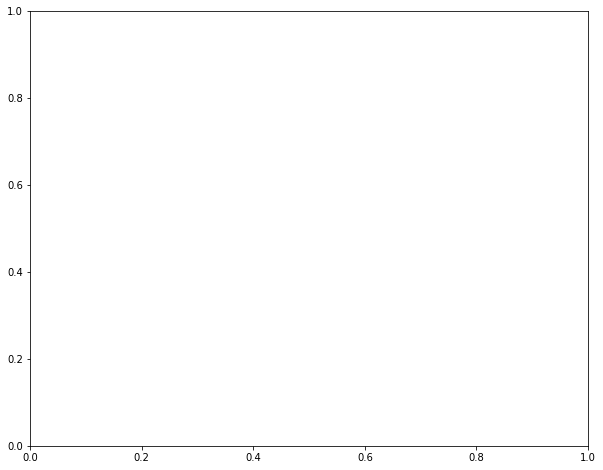

In [65]:
# Plot the data 
fig, ax = plt.subplots(figsize = (10,8))
ax.scatter(weekly_psi_test2.index, 
           weekly_psi_test2["median"],  
           color = 'red')
ax.scatter(weekly_psi_test2.index, 
           weekly_psi_test2["average"],  
           color = 'green')
ax.set(xlabel='Date', ylabel='PSI',
       title="Weekly PSI, Jan - Sep 2019")
plt.show()


In [56]:

monthly_psi = psi_df
test_median2 = monthly_psi.resample('M', on='timestamp').median()
#weekly_psi['average'] = psi_df.average.resample('W').mean()
weekly_psi_test2.head(10)
test_median2


,west,national,east,central,south,north,median,average
timestamp,,,,,,,,
2019-01-31 00:00:00+08:00,36,52,51,46,52,42,48.00,46.500000
2019-02-28 00:00:00+08:00,36,54,49,48,53,43,48.50,47.642857
2019-03-31 00:00:00+08:00,53,58,56,57,57,53,56.00,55.571429
2019-04-30 00:00:00+08:00,52,57,54,55,56,52,54.50,53.857143
2019-05-31 00:00:00+08:00,46,54,52,52,51,53,52.50,51.000000
2019-06-30 00:00:00+08:00,39,48,36,43,41,45,42.00,42.071429
2019-07-31 00:00:00+08:00,53,54,53,52,52,52,52.50,52.357143
2019-08-31 00:00:00+08:00,58,60,59,58,60,57,58.75,58.571429
2019-09-30 00:00:00+08:00,75,77,74,73,76,72,74.50,74.321429


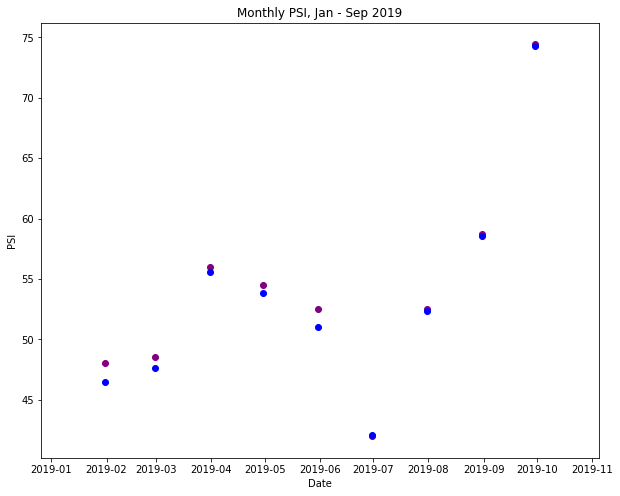

In [62]:
# Plot the data 
fig, ax = plt.subplots(figsize = (10,8))
ax.scatter(test_median2.index, 
           test_median2["median"],  
           color = 'purple')
ax.scatter(test_median2.index, 
           test_median2["average"],  
           color = 'blue')
ax.set(xlabel='Date', ylabel='PSI',
       title="Monthly PSI, Jan - Sep 2019")
plt.show()
